In [1]:
pip install Thymeboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 724.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.5 MB/s eta 0:00:00


In [2]:
!pip install prophet

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruf2akwz/as1rpxp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruf2akwz/sv283vk5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68930', 'data', 'file=/tmp/tmpruf2akwz/as1rpxp4.json', 'init=/tmp/tmpruf2akwz/sv283vk5.json', 'output', 'file=/tmp/tmpruf2akwz/prophet_model07y86prx/prophet_model-20230803002918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:29:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:29:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


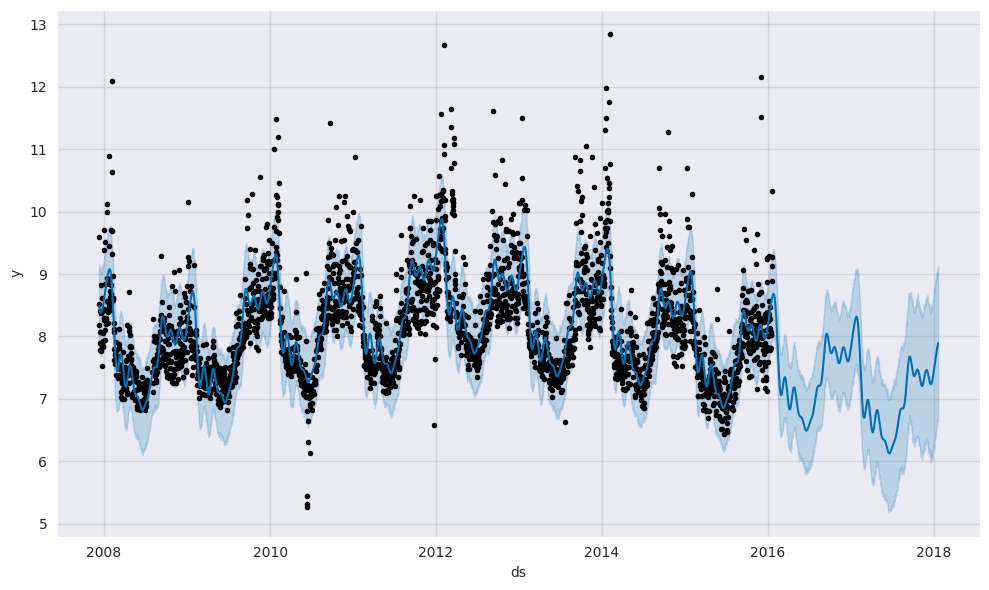

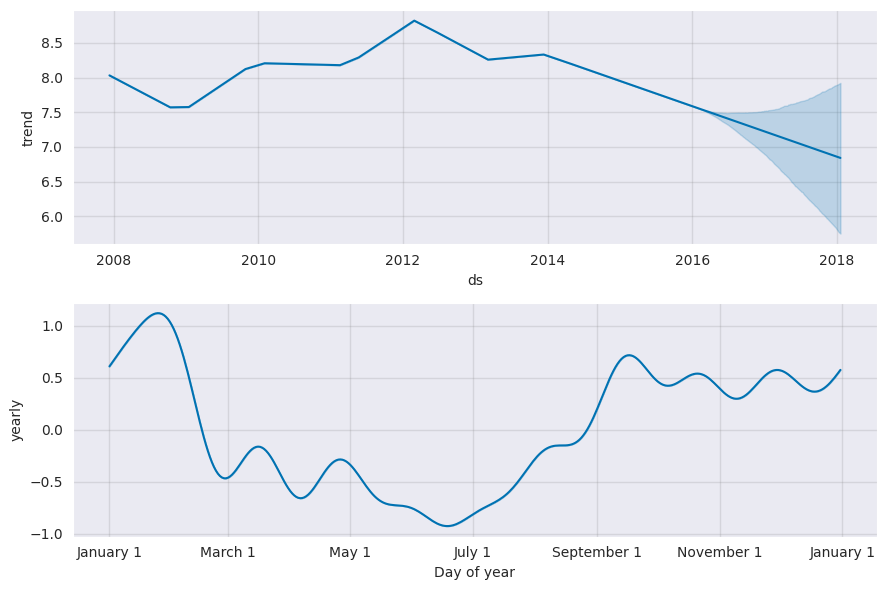

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
m = Prophet(weekly_seasonality=False)
m.fit(df)
future = m.make_future_dataframe(periods=2 * 365)
forecast = m.predict(future)
m.plot(forecast)
m.plot_components(forecast)
plt.show()

In [10]:
from ThymeBoost import ThymeBoost as tb
boosted_model = tb.ThymeBoost(verbose=1,
                            n_rounds=None)

output = boosted_model.fit(df['y'].values,
                            seasonal_period=[365],
                            trend_estimator=['lbf'],
                            n_changepoints=25
                            )

predicted_output = boosted_model.predict(output,
                                          365 * 2)

********** Round 1 **********
Using Split: None
Fitting initial trend globally with trend model:
median()
seasonal model:
fourier(10, False)
cost: -2341.8470210049586
********** Round 2 **********
Using Split: None
Fitting global with trend model:
lbf(25)
seasonal model:
fourier(10, False)
cost: -3283.6285756724137
Boosting Terminated 
Using round 2


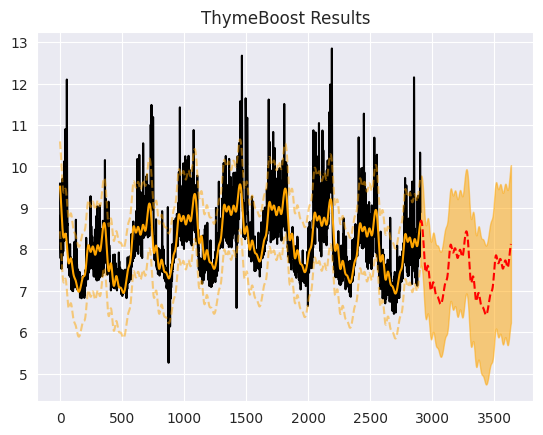

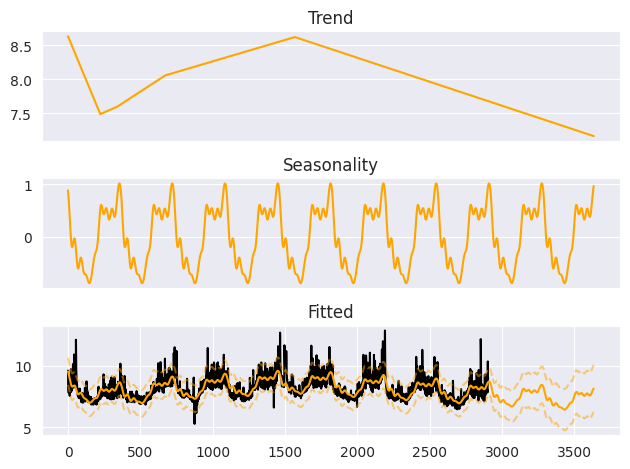

In [11]:
boosted_model.plot_results(output, predicted_output)
boosted_model.plot_components(output, predicted_output)

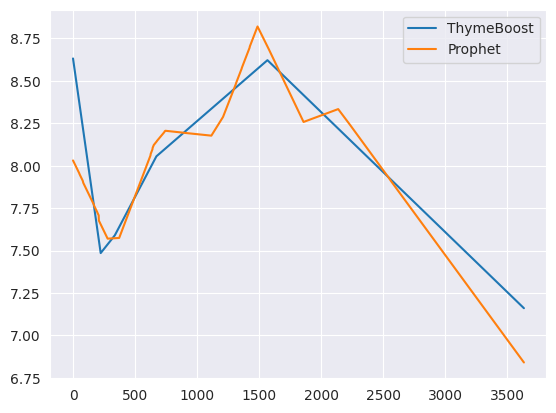

In [12]:
plt.plot(np.append(output['trend'].values, predicted_output['predicted_trend'].values), label='ThymeBoost')
plt.plot(forecast['trend'], label='Prophet')
plt.legend()
plt.show()

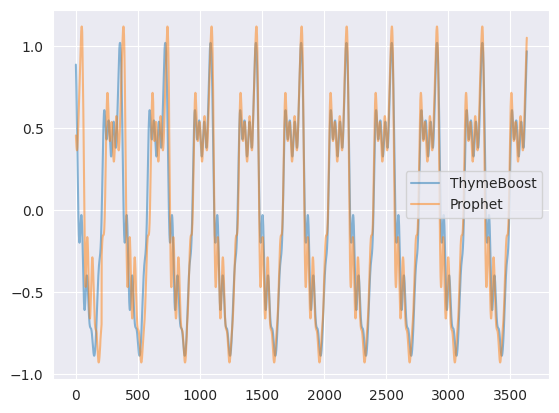

In [13]:
plt.plot(np.append(output['seasonality'].values, predicted_output['predicted_seasonality'].values), label='ThymeBoost', alpha=.5)
plt.plot(forecast['additive_terms'], label='Prophet', alpha=.5)
plt.legend()

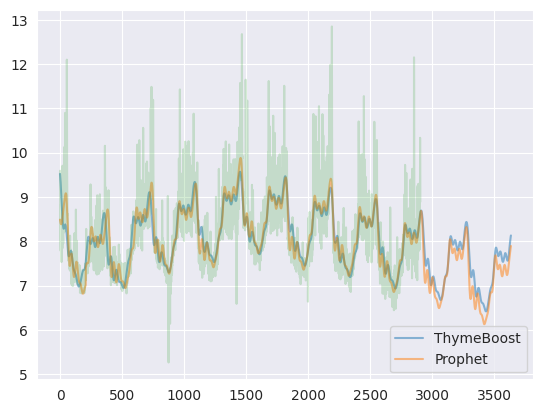

In [16]:
plt.plot(np.append(output['yhat'].values, predicted_output['predictions'].values), label='ThymeBoost', alpha=.5)
plt.plot(forecast['yhat'], label='Prophet', alpha=.5)
plt.plot(df['y'].values, alpha=.2)
plt.legend()

In [17]:
import pandas as pd
hourly_train = pd.read_csv("https://raw.githubusercontent.com/tblume1992/Functime-Benchmark/main/m4_data/hourly_m4_train.csv")
hourly_test = pd.read_csv("https://raw.githubusercontent.com/tblume1992/Functime-Benchmark/main/m4_data/hourly_m4_test.csv")

hourly_train['Datetime'] = pd.to_datetime(hourly_train['Datetime'])
hourly_test['Datetime'] = pd.to_datetime(hourly_test['Datetime'])

In [ ]:
def grouped_forecast(df):
        y = df['V']
        y.index = df['Datetime']
        boosted_model = tb.ThymeBoost()
        output = boosted_model.fit(y,
                                    seasonal_period=[24, 168],
                                    trend_estimator=['lbf'],
                                    global_cost='mse',
                                    additive=False,
                                    )
        predicted_output = boosted_model.predict(output,
                                                  48,
                                                  trend_penalty=True)
        predictions = predicted_output
        return predictions

predictions = hourly_train.groupby('ID').apply(grouped_forecast)
predictions = predictions.reset_index()

benchmark_df = predictions.merge(hourly_test, left_on=['ID', 'level_1'],
                                  right_on=['ID', 'Datetime'])

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
def grouped_smape(df):
    return smape(df['V'], df['predictions'])
test = benchmark_df.groupby('ID').apply(grouped_smape)
print(np.mean(test))

14.263668374416667


In [19]:
def grouped_forecast(df):
        df = df.rename({'V': 'y',
                        'Datetime': 'ds'}, axis=1)
        m = Prophet()
        m.fit(df)
        future = m.make_future_dataframe(freq='H', periods=48)
        forecast = m.predict(future)
        return forecast

predictions = hourly_train.groupby('ID').apply(grouped_forecast)
predictions = predictions.reset_index()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruf2akwz/kpbrnxsm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpruf2akwz/f5ghm1ai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7064', 'data', 'file=/tmp/tmpruf2akwz/kpbrnxsm.json', 'init=/tmp/tmpruf2akwz/f5ghm1ai.json', 'output', 'file=/tmp/tmpruf2akwz/prophet_modelw443v_jc/prophet_model-20230803003704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:37:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:37:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tm

In [20]:
benchmark_df = predictions.merge(hourly_test, left_on=['ID', 'ds'],
                                  right_on=['ID', 'Datetime'])

def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
def grouped_smape(df):
    return smape(df['V'], df['yhat'])
test = benchmark_df.groupby('ID').apply(grouped_smape)
print(np.mean(test))

18.095602308347065
